In [ ]:
from evaluation import evaluate_dream_interpretations
import pandas as pd
# dreams_interpretations_df = pd.read_csv('datasets/Mistral-7B-Instruct-v0.2_25.04.17-16.csv')
# dreams_interpretations_df = evaluate_dream_interpretations(dreams_interpretations_df)
# dreams_interpretations_df.to_csv('datasets/Mistral-7B-Instruct-v0.2_25.04.17-16_evaluated.csv', index=False)
# dreams_interpretations_df

In [ ]:
from utils import read_csvs
from summarizer import PromptFormatter
model_family="decoder"

formatter = PromptFormatter(model_family)

In [ ]:
dataset = read_csvs(save_dir = "output")
dataset["meaning"] = dataset.interpretation.apply(formatter.unformat)
dataset = dataset[dataset.filename.str.contains('.*20250506.*', regex= True)][["dream", "symbols", "meaning"]]
dataset

In [14]:
dreams_interpretations_df = evaluate_dream_interpretations(dataset, interpretation_column = 'meaning')
dreams_interpretations_df.to_csv('datasets/Mistral-7B-Instruct-v0.2_25.05.06_evaluated.csv', index=False)


/home/ofirn/Dream-Interpreter/.venv/lib/python3.10/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/ofirn/Dream-Interpreter/.venv/lib/python3.10/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
dreams_interpretations_df

,dream,symbols,meaning,BLEU,perplexity,ROUGE,BERT
0,"I was in my house with Cassie, Katie, and Kris...",- Ocean: To see an ocean in your dream repre...,The dream starts with the dreamer having a sle...,0.070566,7.656720e+06,0.322835,0.517825
1,The Spiral Flight I walk over near a line of ...,- Baby Carriage: To see a baby carriage in y...,The dreamer is in a situation where he feels l...,0.063594,1.682720e+13,0.311978,0.537402
2,Snowblower Thieves I'm sitting on a ledge of ...,- Can Opener: To see a can opener in your dr...,The dreamer is in a position of observing a cr...,0.014108,5.731736e+16,0.259819,0.330628
3,The group of us had just heard something about...,- Dementia: To dream that you or someone has...,"The dreamer's grandfather, who is a symbol of ...",0.118008,2.068286e+08,0.437500,0.570443
4,We were at Grandma's. In the front room. I had...,- Hanging: To watch a hanging in your dream ...,The dreamer is feeling overwhelmed and insecur...,0.088973,6.014241e+16,0.453202,0.412650
...,...,...,...,...,...,...,...
25,Melanie's Letter I'm at the Redding farm. I h...,- Adultery: To dream that you commit adulter...,The dream is about Melanie and Melanie's lette...,0.182024,1.448663e+11,0.481481,0.611827
26,"We had strawberries, blackberries in our house...",- Delinquent: To see a delinquent in your dr...,The dream starts with the image of ripe strawb...,0.088829,5.443940e+12,0.329787,0.486142
27,I dreamed I was walking down a corridor in a U...,- Deja Vu: To dream of Déjà Vu indicates som...,The dreamer is in a situation where she is bei...,0.028960,2.457480e+06,0.291667,0.520156
28,"I can't remember properly, but I had climbed d...",- Camera: To see a camera in your dream sign...,The dreamer is trying to capture memories or m...,0.034624,6.904941e+02,0.256410,0.408686


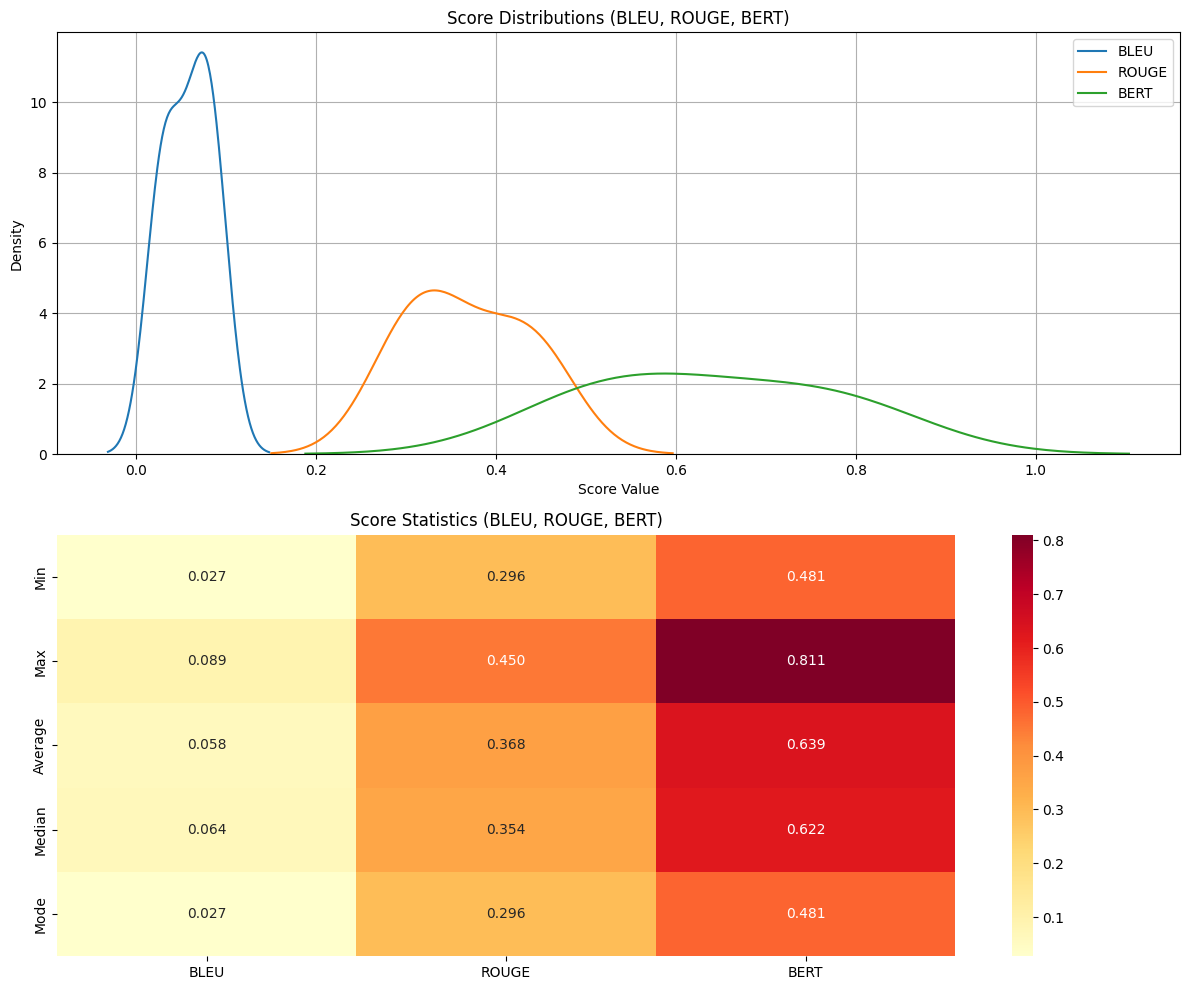

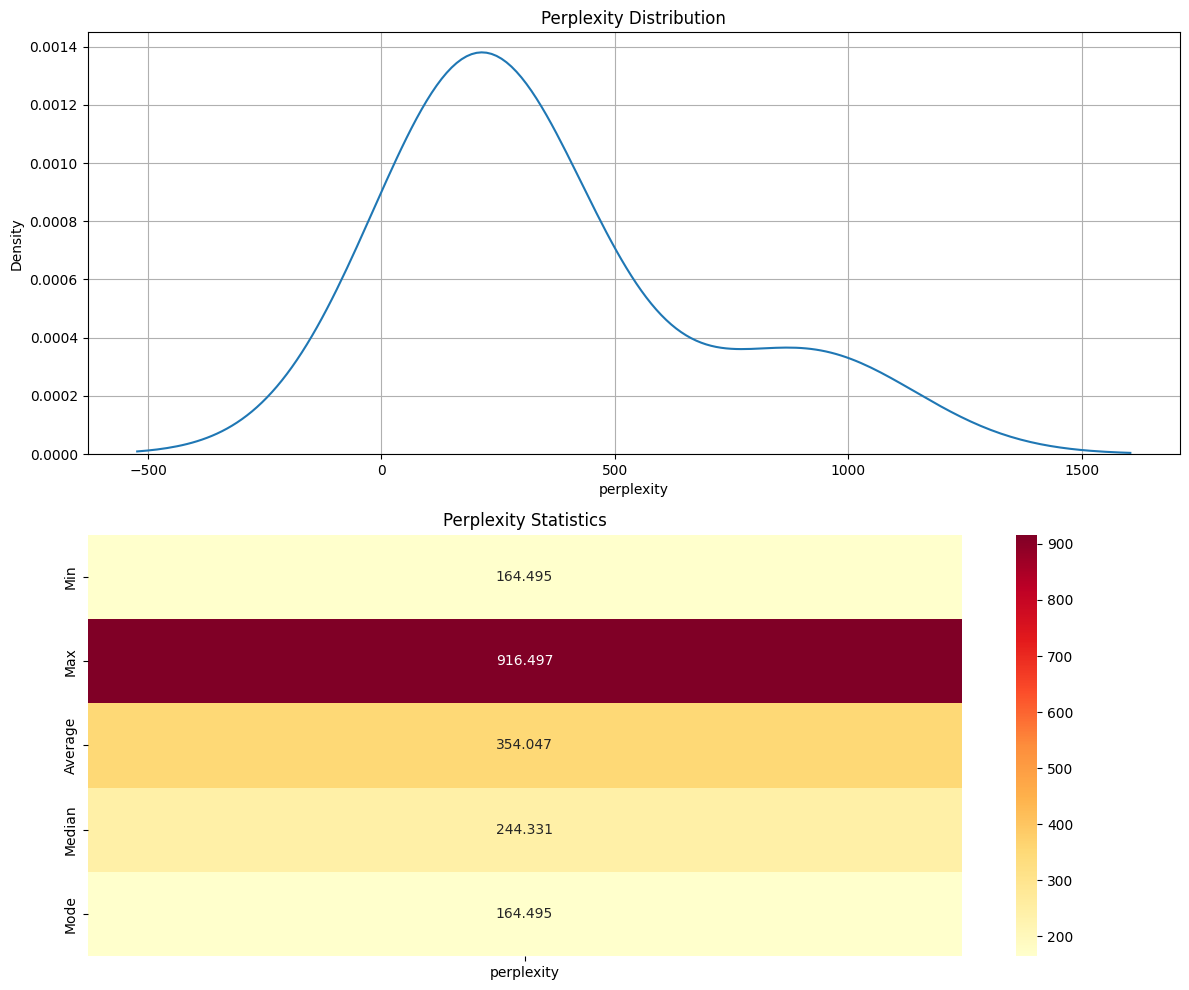

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Create figure with subplots for non-perplexity scores
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot distributions without perplexity
scores_without_perplexity = ['BLEU', 'ROUGE', 'BERT']
for score in scores_without_perplexity:
    sns.kdeplot(data=dreams_interpretations_df[score], label=score, ax=ax1)
ax1.set_title('Score Distributions (BLEU, ROUGE, BERT)')
ax1.legend()

# Calculate statistics for heatmap without perplexity
stats_df = pd.DataFrame()
for score in scores_without_perplexity:
    stats_df[score] = [
        dreams_interpretations_df[score].min(),
        dreams_interpretations_df[score].max(),
        dreams_interpretations_df[score].mean(),
        dreams_interpretations_df[score].median(),
        stats.mode(dreams_interpretations_df[score])[0]
    ]
stats_df.index = ['Min', 'Max', 'Average', 'Median', 'Mode']

# Plot heatmap
sns.heatmap(stats_df, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax2)
ax2.set_title('Score Statistics (BLEU, ROUGE, BERT)')
plt.tight_layout()

# Create separate figure for perplexity
fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 10))

# Plot perplexity distribution
sns.kdeplot(data=dreams_interpretations_df['perplexity'], ax=ax3)
ax3.set_title('Perplexity Distribution')

# Calculate perplexity statistics
perplexity_stats = pd.DataFrame({
    'perplexity': [
        dreams_interpretations_df['perplexity'].min(),
        dreams_interpretations_df['perplexity'].max(),
        dreams_interpretations_df['perplexity'].mean(),
        dreams_interpretations_df['perplexity'].median(),
        stats.mode(dreams_interpretations_df['perplexity'])[0]
    ]
})
perplexity_stats.index = ['Min', 'Max', 'Average', 'Median', 'Mode']

# Plot perplexity heatmap
sns.heatmap(perplexity_stats, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax4)
ax4.set_title('Perplexity Statistics')
plt.tight_layout()

plt.show()


We can draw the following conclusions:
1. The bleu score is incredibly low (a good result should be 20-40, we didn't even get 1...). This means that there is a weak overlap between the dream and its interpretation.
2. Same for the Rouge.
3. BERT averages at 0.6, which is not that bad considering that a good value is 0.85–0.9 that indicates some semantic similarity between the dream and its interpretation.
4. perplexity is terrible since a good value is under 20...
5. We interpret the results using this table:

| **Metric** | **High Score Meaning** | **Low Score Meaning** | **Preferred Score** | **Typical Values for Good Results** | **Why?** |
| --- | --- | --- | --- | --- | --- |
| **BLEU** | High n-gram overlap between reference and candidate text | Low n-gram overlap between reference and candidate text | **High** | 20–40 (moderate), 40+ (good) | High BLEU indicates the candidate text closely matches the reference text. |
| **Perplexity** | Candidate text is unpredictable and diverges from reference distribution | Candidate text is predictable, fluent, and aligned with reference distribution | **Low** | < 20 (for good results) | Low perplexity shows that the candidate text is fluent, consistent, and aligned with the reference. |
| **ROUGE** | More overlapping n-grams (e.g., unigrams, bigrams) and higher recall of key phrases | Fewer overlapping n-grams and poor recall of key phrases | **High** | 30–50 (good), 50+ (very good) | High ROUGE suggests greater similarity between the candidate and reference texts. |
| **BERTScore** | Strong semantic similarity between the candidate and reference text | Weak semantic similarity between the candidate and reference text | **High** | 0.85–0.98 (good) | Higher BERTScore reflects that the candidate preserves the meaning of the reference text. |

